In [2]:
from typing import Any
import matplotlib.pyplot as plt
import numpy as np
import leapint
import initial
from matplotlib import animation

In [3]:
mass_unit = 1/4558

mass = 1 * mass_unit#Solar masses
epsilon = 0.1 
R_min = 25 #Kiloparsecs
iA = np.pi/12 
iB = np.pi/4
#iA = 0
#iB = 0
ecc = 0.6
num_steps = 80000
dt = 5
skip_frames = 600


In [16]:
pos_disk, vel_disk = initial.initdisk(25, mass, epsilon=epsilon)


position, velocity, position_m, velocity_m = leapint.leapfrog(pos_disk, vel_disk, np.array([[0, 0, 0]]), np.array([[0, 0, 0]]), num_steps, dt, np.array([mass]), epsilon=epsilon)
np.shape(velocity)
#print(velocity[0, 0, 0])
#np.sqrt(velocity[0, 0, 0]**2, velocity[0, 0, 1]**2)
#np.sqrt(velocity[1000, 0, 0]**2, velocity[1000, 0, 1]**2)

(50001, 297, 3)

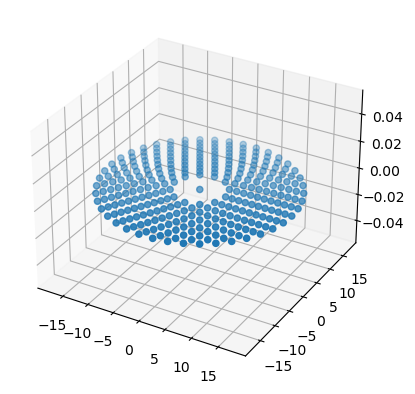

In [4]:
fig = plt.figure()

def animate(i):
    fig.clear()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(np.concatenate((position[i], position_m[i]), axis = 0).transpose()[0], np.concatenate((position[i], position_m[i]), axis = 0).transpose()[1], np.concatenate((position[i], position_m[i]), axis = 0).transpose()[2])
ani = animation.FuncAnimation(fig, animate, frames=range(0, np.shape(position)[0], skip_frames))
ani.save('singledisk.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

In [4]:
pos_m, vel_m, pos_cm, vel_cm = initial.initmice(R_min, mass, 0, 0, 0, iA,  iB, ecc, 12, epsilon)

vel_m *= 1/4 + 1/8 - 1/16

vel_cm[:vel_cm.shape[0]//2] -= vel_m[0]
vel_cm[vel_cm.shape[0]//2:] -= vel_m[1]
#vel_m *= 0
position = np.zeros((num_steps // skip_frames+1, *pos_cm.shape))
velocity = np.zeros((num_steps // skip_frames+1, *vel_cm.shape))
position_m = np.zeros((num_steps // skip_frames+1, *pos_m.shape))
velocity_m = np.zeros((num_steps // skip_frames+1, *vel_m.shape))

position[0] = pos_cm
velocity[0] = vel_cm
position_m[0] = pos_m
velocity_m[0] = vel_m



for i in range(num_steps//skip_frames):
    tem_position, tem_velocity, tem_position_m, tem_velocity_m = leapint.leapfrog(position[i], velocity[i], position_m[i], velocity_m[i], skip_frames, dt, np.array([mass, mass]), epsilon=epsilon)
    position[i+1] = tem_position[-1]
    velocity[i+1] = tem_velocity[-1]
    position_m[i+1] = tem_position_m[-1]
    velocity_m[i+1] = tem_velocity_m[-1]

print(position.shape)
#print(velocity[0, 0, 0])
#np.sqrt(velocity[0, 0, 0]**2, velocity[0, 0, 1]**2)
#np.sqrt(velocity[1000, 0, 0]**2, velocity[1000, 0, 1]**2)

(134, 594, 3)


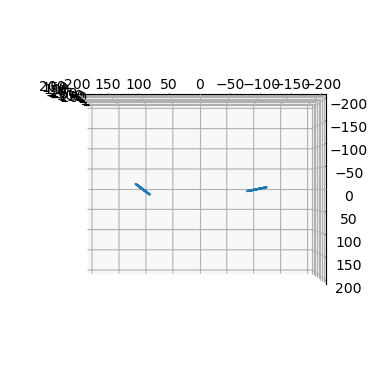

In [6]:
fig = plt.figure()

def animate(i):
    fig.clear()
    ax = fig.add_subplot(projection='3d')
    ax.set_zlim([-200, 200])
    ax.set_xlim([-200, 200])
    ax.set_ylim([-200, 200])
    ax.view_init(elev=-5, azim=-0, roll=180)
    ax.scatter(np.concatenate((position[i], position_m[i]), axis = 0).transpose()[0], np.concatenate((position[i], position_m[i]), axis = 0).transpose()[1], np.concatenate((position[i], position_m[i]), axis = 0).transpose()[2], s=0.2)
    
ani = animation.FuncAnimation(fig, animate, frames=range(0, np.shape(position)[0]))
ani.save('fullsim.mp4', fps=30, extra_args=['-vcodec', 'libx264'])